In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from moonpies import moonpies as mp
from moonpies import default_config

CFG = default_config.Cfg()

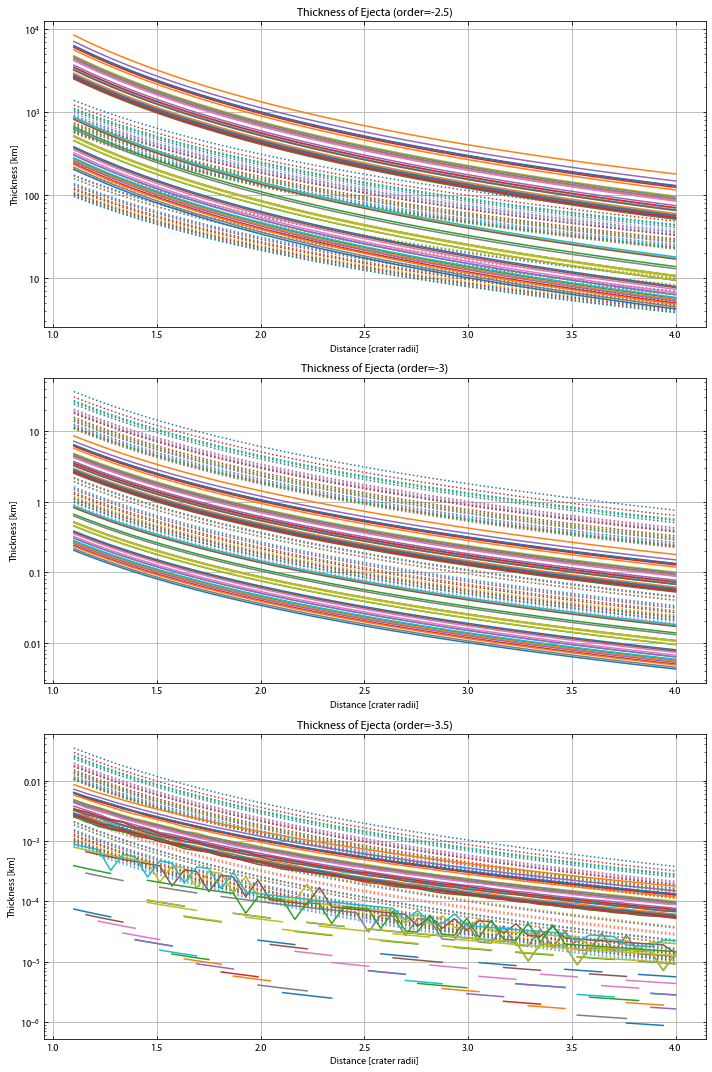

In [14]:
#Variables for thickness equations
crater_list = mp.get_crater_list(basins=True)
rad = crater_list.rad.values[:, np.newaxis]  # [m] crater radii column vector
r = mp.final2transient(rad*2) / 2
d = np.linspace(1.1, 4) # [crater radii] 1D Array of distance values
d_m = d * r  # [m] distance values in meters

# Plot
f, axs = plt.subplots(3, figsize =(10,15))
orders = [-2.5, -3, -3.5]
for i, (ax, order) in enumerate(zip(axs, orders)):
    thickness = mp.get_ejecta_thickness(d_m, r, order=order)
    t2 = mp.get_ejecta_thickness_basin(d_m, r)
    ax.semilogy(d, thickness.T, ':')
    ax.semilogy(d, t2.T, '-')
    ax.set_title(f'Thickness of Ejecta (order={order})')
    ax.set_xlabel('Distance [crater radii]')
    ax.set_ylabel('Thickness [km]')
    # ax.set_xlim(1, 4)
    # ax.set_ylim(0, 1000)
plt.show()